<a href="https://colab.research.google.com/github/nimrco/Msc-Thesis/blob/master/Pseudo_cluster_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/stats_with_size.csv")
df

,Cluster,State,Gene Count,Pseudo Count,Gene Ratio,Pseudo Ratio,Gene Cluster Size,Pseudo Cluster Size
0,26546,Alone,19,2,0.787402,1.063830,2413,188
1,26546,With opposite type,99,123,4.102777,65.425532,2413,188
2,26546,With same type,2295,63,95.109822,33.510638,2413,188
3,36807,Alone,12,1,0.490597,8.333333,2446,12
4,36807,With opposite type,11,11,0.449714,91.666667,2446,12
...,...,...,...,...,...,...,...,...
11650,66190,With opposite type,0,0,0.000000,0.000000,1,3
11651,66190,With same type,0,0,0.000000,0.000000,1,3
11652,66426,Alone,1,3,100.000000,100.000000,1,3
11653,66426,With opposite type,0,0,0.000000,0.000000,1,3


In [ ]:
df['Gene Ratio'] = df['Gene Ratio'].apply(lambda x: x / 100)
df['Pseudo Ratio'] = df['Pseudo Ratio'].apply(lambda x: x / 100)
df

,Cluster,State,Gene Count,Pseudo Count,Gene Ratio,Pseudo Ratio,Gene Cluster Size,Pseudo Cluster Size
0,26546,Alone,19,2,0.007874,0.010638,2413,188
1,26546,With opposite type,99,123,0.041028,0.654255,2413,188
2,26546,With same type,2295,63,0.951098,0.335106,2413,188
3,36807,Alone,12,1,0.004906,0.083333,2446,12
4,36807,With opposite type,11,11,0.004497,0.916667,2446,12
...,...,...,...,...,...,...,...,...
11650,66190,With opposite type,0,0,0.000000,0.000000,1,3
11651,66190,With same type,0,0,0.000000,0.000000,1,3
11652,66426,Alone,1,3,1.000000,1.000000,1,3
11653,66426,With opposite type,0,0,0.000000,0.000000,1,3


In [ ]:
df = df[(df['Gene Cluster Size'] < 2500) & (df['Pseudo Cluster Size'] < 2500) & (df['Gene Cluster Size'] > 2) & (df['Pseudo Cluster Size'] > 2)]
df

,Cluster,State,Gene Count,Pseudo Count,Gene Ratio,Pseudo Ratio,Gene Cluster Size,Pseudo Cluster Size
0,26546,Alone,19,2,0.007874,0.010638,2413,188
1,26546,With opposite type,99,123,0.041028,0.654255,2413,188
2,26546,With same type,2295,63,0.951098,0.335106,2413,188
3,36807,Alone,12,1,0.004906,0.083333,2446,12
4,36807,With opposite type,11,11,0.004497,0.916667,2446,12
...,...,...,...,...,...,...,...,...
9862,62608,With opposite type,2,2,0.666667,0.007326,3,273
9863,62608,With same type,0,261,0.000000,0.956044,3,273
9864,62893,Alone,0,0,0.000000,0.000000,3,29
9865,62893,With opposite type,0,0,0.000000,0.000000,3,29


In [ ]:
gene_median = df['Gene Cluster Size'].median()
pseudo_median = df['Pseudo Cluster Size'].median()

In [ ]:
def assignClass(row):
  gene_size = row['Gene Cluster Size']
  pseudo_size = row['Pseudo Cluster Size']

  if gene_size >= gene_median and pseudo_size >= pseudo_median:
    return 'Above than both cluster size medians'
  elif gene_size >= gene_median and pseudo_size < pseudo_median:
    return 'Above gene cluster size median'
  elif gene_size < gene_median and pseudo_size >= pseudo_median:
    return 'Above pseudogene cluster size median'
  else: # gene_size < gene_median and pseudo_size < pseudo_median
    return 'Lower than both cluster size medians' 

In [ ]:
df['Class'] = df.apply(assignClass, axis=1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cluster,State,Gene Count,Pseudo Count,Gene Ratio,Pseudo Ratio,Gene Cluster Size,Pseudo Cluster Size,Class
0,26546,Alone,19,2,0.007874,0.010638,2413,188,Above than both cluster size medians
1,26546,With opposite type,99,123,0.041028,0.654255,2413,188,Above than both cluster size medians
2,26546,With same type,2295,63,0.951098,0.335106,2413,188,Above than both cluster size medians
3,36807,Alone,12,1,0.004906,0.083333,2446,12,Above than both cluster size medians
4,36807,With opposite type,11,11,0.004497,0.916667,2446,12,Above than both cluster size medians
...,...,...,...,...,...,...,...,...,...
9862,62608,With opposite type,2,2,0.666667,0.007326,3,273,Above pseudogene cluster size median
9863,62608,With same type,0,261,0.000000,0.956044,3,273,Above pseudogene cluster size median
9864,62893,Alone,0,0,0.000000,0.000000,3,29,Above pseudogene cluster size median
9865,62893,With opposite type,0,0,0.000000,0.000000,3,29,Above pseudogene cluster size median


In [ ]:
sns.set_theme(style="white")

In [ ]:
df.rename(columns={"State": "Label"}, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cluster,Label,Gene Count,Pseudo Count,Gene Ratio,Pseudo Ratio,Gene Cluster Size,Pseudo Cluster Size
0,26546,Alone,19,2,0.007874,0.010638,2413,188
1,26546,With opposite type,99,123,0.041028,0.654255,2413,188
2,26546,With same type,2295,63,0.951098,0.335106,2413,188
3,36807,Alone,12,1,0.004906,0.083333,2446,12
4,36807,With opposite type,11,11,0.004497,0.916667,2446,12
...,...,...,...,...,...,...,...,...
9862,62608,With opposite type,2,2,0.666667,0.007326,3,273
9863,62608,With same type,0,261,0.000000,0.956044,3,273
9864,62893,Alone,0,0,0.000000,0.000000,3,29
9865,62893,With opposite type,0,0,0.000000,0.000000,3,29


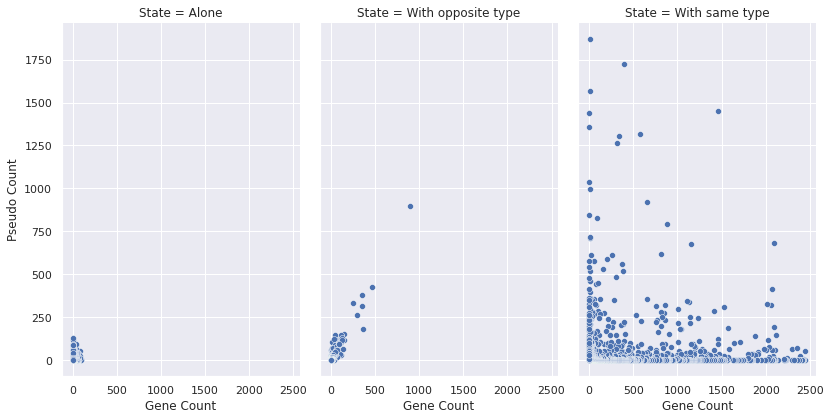

In [ ]:
g = sns.FacetGrid(df, col="State", height=6, aspect=.65)
g.map(sns.scatterplot, "Gene Count", "Pseudo Count")

<a list of 8 Text major ticklabel objects>
<a list of 0 Text major ticklabel objects>
<a list of 0 Text major ticklabel objects>


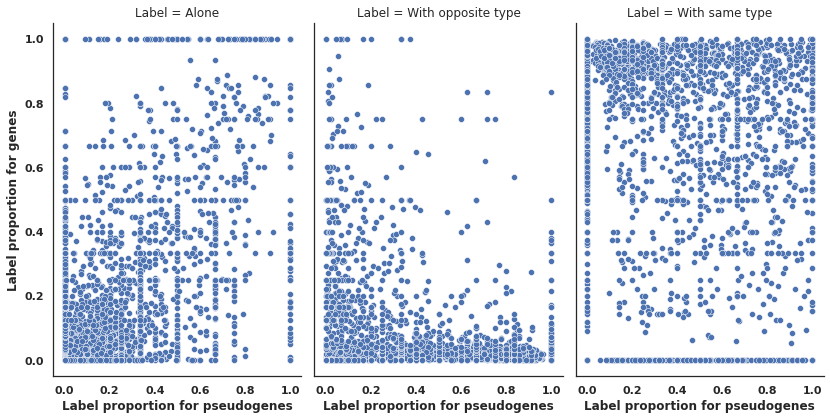

In [ ]:
g = sns.FacetGrid(df, col="Label", height=6, aspect=.65)
g.map(sns.scatterplot, "Pseudo Ratio", "Gene Ratio")
g.set_axis_labels("Label proportion for pseudogenes", "Label proportion for genes", fontdict=dict(weight='bold'))
for ax in g.axes.flatten():
  print(ax.get_yticklabels())
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
g.axes.flatten()[0].set_yticklabels(g.axes.flatten()[0].get_yticklabels(), fontweight='bold')
plt.tight_layout()
plt.savefig('gene_pseudo_ratio_states_scatter_no_color.png', dpi=300, bbox_inches="tight")

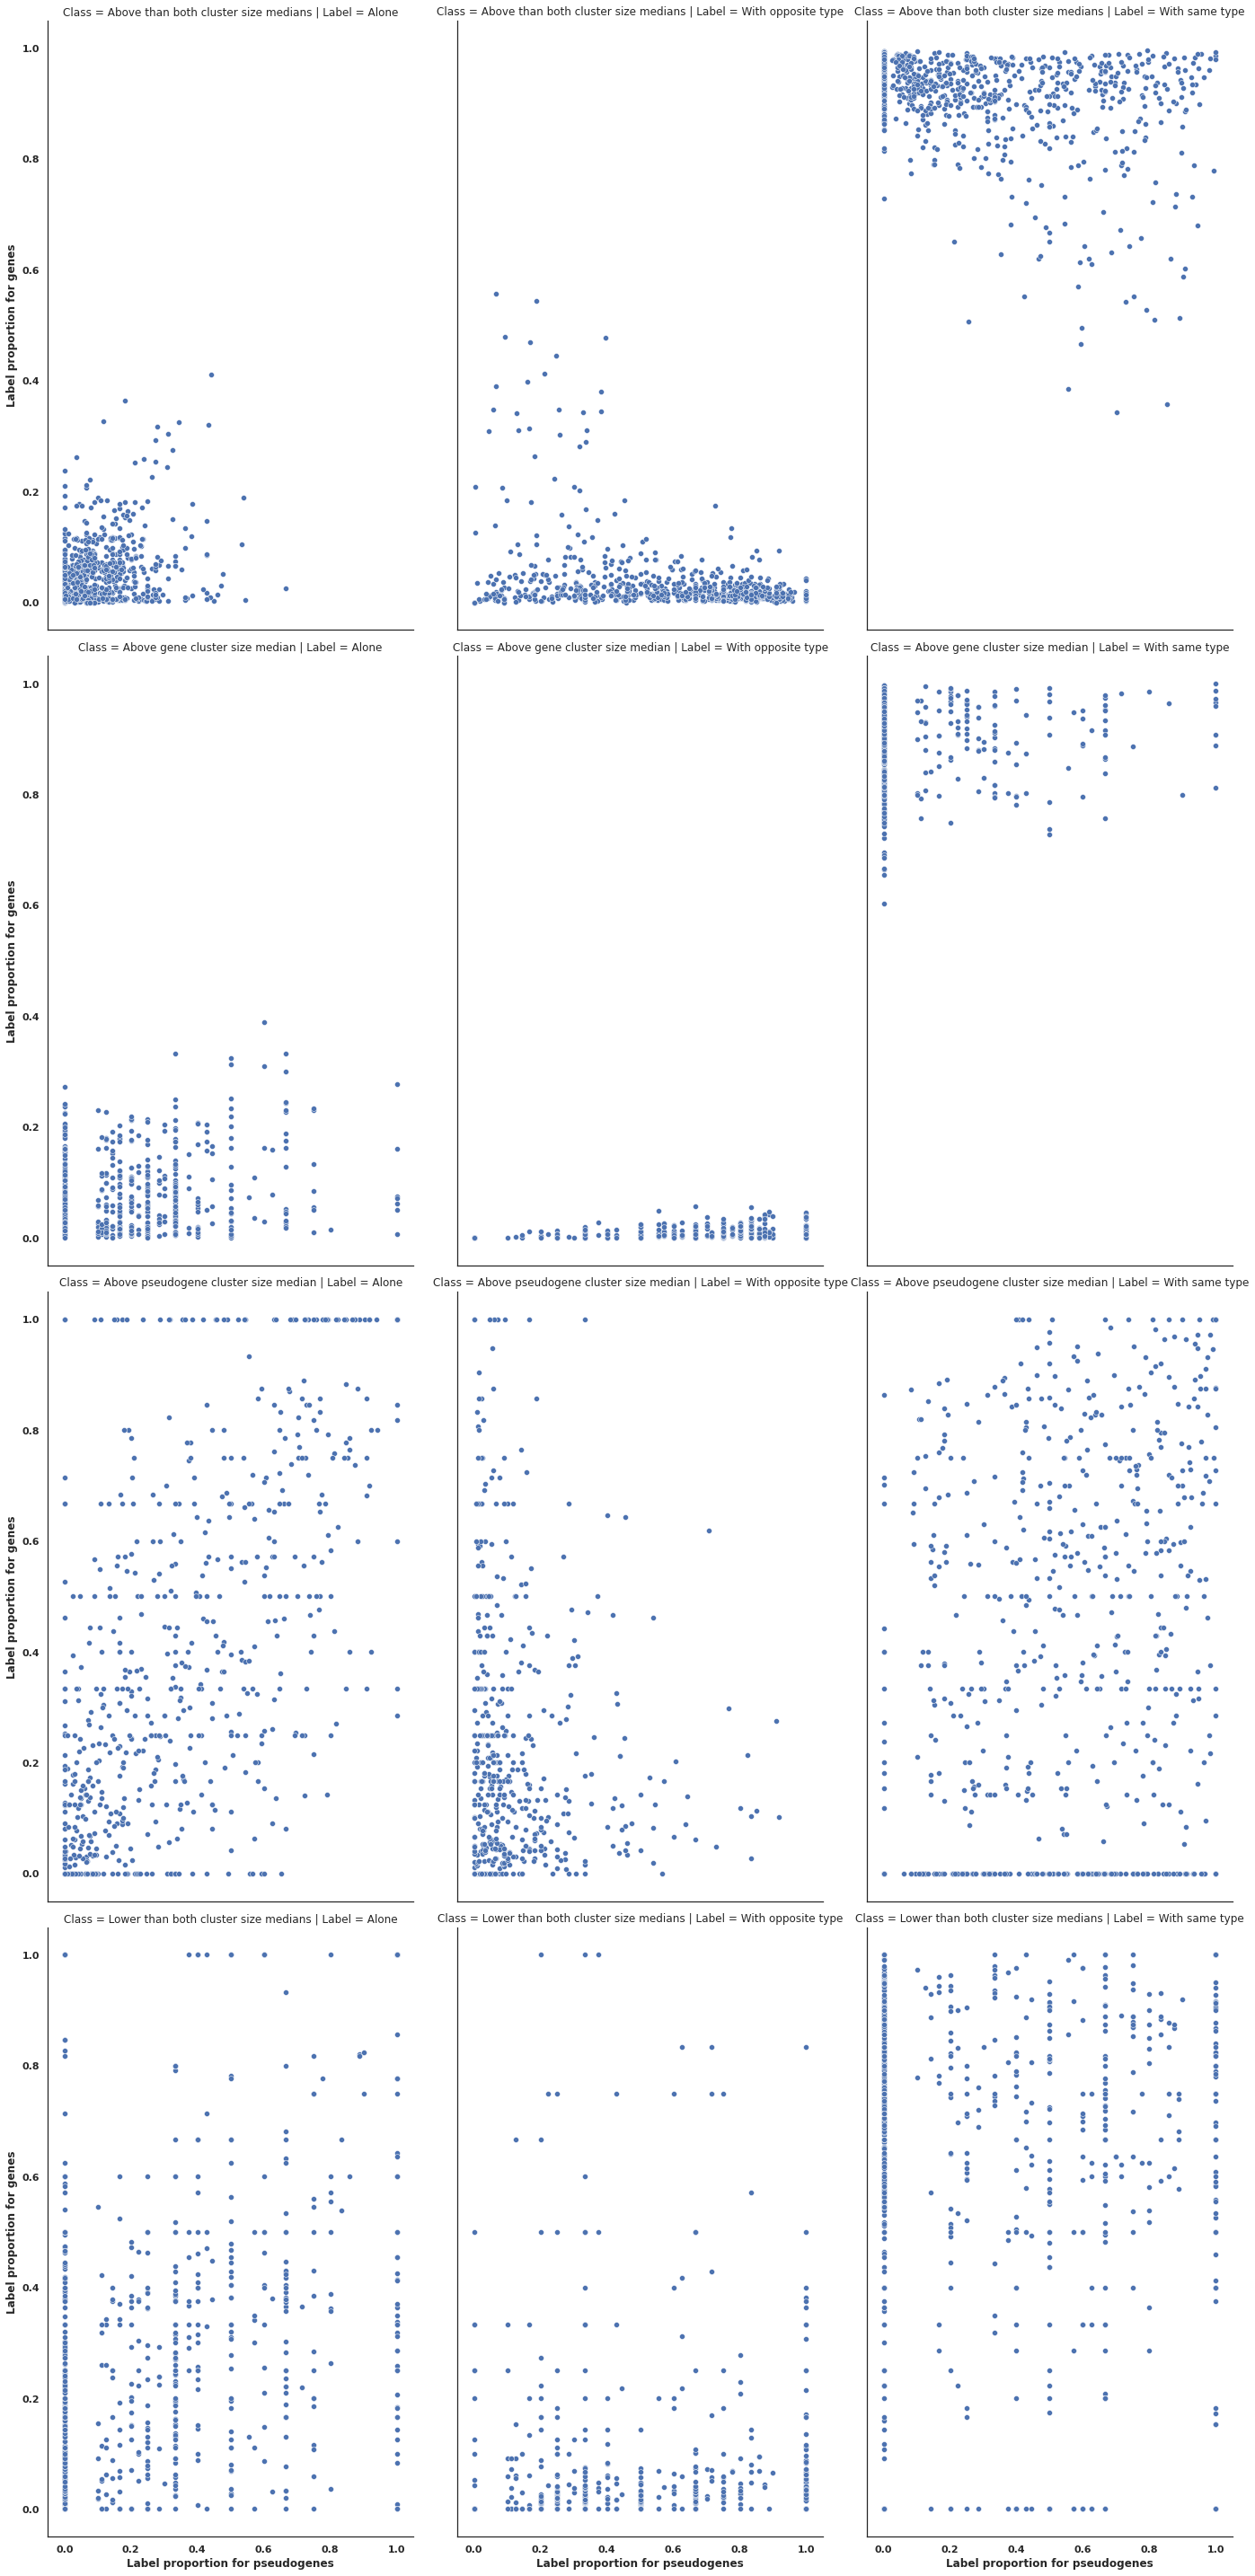

In [ ]:
g = sns.FacetGrid(df, col="Label", row='Class', height=10, aspect=.65)
g.map(sns.scatterplot, "Pseudo Ratio", "Gene Ratio")
# g.refline(x=pseudo_median, color='yellow', linestyle='-', label=None)
# g.refline(y=gene_median, color='black', linestyle='-', label=None)
# plt.axvline(x=pseudo_median, color='orange', linestyle='--', label='Median of pseudogene ratio = {:.2f}'.format(pseudo_median))
# plt.axhline(y=gene_median, color='green', linestyle='--', label='Median of gene ratio = {:.2f}'.format(gene_median))
# for ax in g.axes.ravel():
#   handles, labels = ax.get_legend_handles_labels()
#   ax.legend(handles[-4:], labels[-4:], loc='upper right')
# plt.ylabel("Label proportion for genes", fontdict=dict(weight='bold'))
# plt.xlabel("")
g.set_axis_labels("Label proportion for pseudogenes", "Label proportion for genes", fontdict=dict(weight='bold'))
for ax in g.axes.flatten():
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
  # print(ax.get_yticklabels())
  # ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
g.axes.flatten()[0].set_yticklabels(g.axes.flatten()[0].get_yticklabels(), fontweight='bold')
g.axes.flatten()[3].set_yticklabels(g.axes.flatten()[3].get_yticklabels(), fontweight='bold')
g.axes.flatten()[6].set_yticklabels(g.axes.flatten()[6].get_yticklabels(), fontweight='bold')
g.axes.flatten()[9].set_yticklabels(g.axes.flatten()[9].get_yticklabels(), fontweight='bold')
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('gene_pseudo_ratio_states_scatter.png', dpi=300, bbox_inches="tight")